,Territorio,VOTO,Pm10 2018,Pm2.5 2018,NO2 2018,Pm10 2017,Pm2.5 2017,NO2 2017,Pm10 2016,Pm2.5 2016,...,Tipo dato,SEXISTAT1,Sesso,CAUSEMORTE_SL,Causa iniziale di morte - European Short List,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,Catania,3,25,nd,33,25,nd,37,24,nd,...,morti,1,maschi,1,alcune malattie infettive e parassitarie,2018,2018,76.00,NaN,NaN
1,Catania,3,25,nd,33,25,nd,37,24,nd,...,morti,1,maschi,1_1,tubercolosi,2018,2018,1.00,NaN,NaN
2,Catania,3,25,nd,33,25,nd,37,24,nd,...,morti,1,maschi,2,tumori,2018,2018,1504.00,NaN,NaN
3,Catania,3,25,nd,33,25,nd,37,24,nd,...,morti,1,maschi,2_1,tumori maligni,2018,2018,1428.00,NaN,NaN
4,Catania,3,25,nd,33,25,nd,37,24,nd,...,morti,1,maschi,2_1_1,"di cui tumori maligni delle labbra, cavità ora...",2018,2018,41.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3857,Trento,1,22,14,39,24,16,44,22,15,...,quoziente di mortalità (per 10.000 abitanti),1,maschi,8_3_1,di cui asma,2018,2018,0.11,NaN,NaN
3858,Trento,1,22,14,39,24,16,44,22,15,...,morti,2,femmine,2_1_11,di cui tumori maligni della cervice uterina,2018,2018,4.00,NaN,NaN
3859,Trento,1,22,14,39,24,16,44,22,15,...,quoziente di mortalità (per 10.000 abitanti),2,femmine,2_1_11,di cui tumori maligni della cervice uterina,2018,2018,0.15,NaN,NaN
3860,Trento,1,22,14,39,24,16,44,22,15,...,morti,2,femmine,1_1,tubercolosi,2018,2018,4.00,NaN,NaN


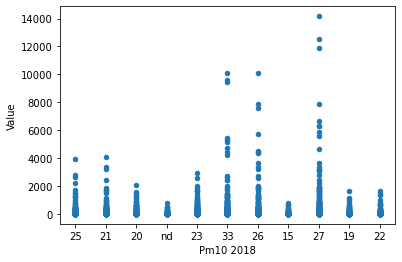

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

morti=pd.read_csv('../csv/morti_province_definitivo.csv', encoding='utf-8', sep=',')
inq_prov=pd.read_csv('../csv/Foglio_Chino.csv', encoding='utf-8', sep=',')

inq_prov=inq_prov.rename(columns={"Unnamed: 0":"Territorio","Unnamed: 1":"VOTO","2018":"Pm10 2018","Unnamed: 3":"Pm2.5 2018",
"Unnamed: 4":"NO2 2018","2017":"Pm10 2017","Unnamed: 6":"Pm2.5 2017", "Unnamed: 7":"NO2 2017",
"2016":"Pm10 2016","Unnamed: 9":"Pm2.5 2016", "Unnamed: 10":"NO2 2016",
"2015":"Pm10 2015","Unnamed: 12":"Pm2.5 2015", "Unnamed: 13":"NO2 2015",
"2014":"Pm10 2014","Unnamed: 15":"Pm2.5 2014", "Unnamed: 16":"NO2 2014"})

#balza la prima riga
inq_prov=inq_prov.iloc[1:]

result=pd.merge(inq_prov, morti, on="Territorio")
result.plot.scatter(x="Pm10 2018", y="Value")
result
#plt.show()